<a href="https://colab.research.google.com/github/lamiaoua/Product-Outlet-Sales-Analysis-and-Prediction/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Import data on Google Colab
from google.colab import files
import io
uploaded = files.upload()






Saving train.xlsx to train (1).xlsx


In [ ]:
# Specify the path to your Excel file
excel_file = 'train.xlsx'
# Read the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file)
# Specify the path to save the CSV file
csv_file = 'data.csv'
# Save the DataFrame as CSV
df.to_csv(csv_file, index=False)


df = pd.read_csv('data.csv')

#show first 5 lines

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#EDA
## Basic Data Exploration

# Show the shape of the dataset
print("\nShape of the dataset:")
print(df.shape)

# Show dataset information
print("\nInfo of the dataset:")
print(df.info())

# Display a statistical summary of the dataset
print("\nSummary of the dataset:")
print(df.describe())


Shape of the dataset:
(8523, 12)

Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage:

In [ ]:
#Handling missing value
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:

missing_percentages = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame with the percentages of missing values
missing_data = pd.DataFrame({'Missing Percentage': missing_percentages})

# Show columns with their percentage of missing values
print(missing_data)


                           Missing Percentage
Item_Identifier                      0.000000
Item_Weight                         17.165317
Item_Fat_Content                     0.000000
Item_Visibility                      0.000000
Item_Type                            0.000000
Item_MRP                             0.000000
Outlet_Identifier                    0.000000
Outlet_Establishment_Year            0.000000
Outlet_Size                         28.276428
Outlet_Location_Type                 0.000000
Outlet_Type                          0.000000
Item_Outlet_Sales                    0.000000


<Axes: >

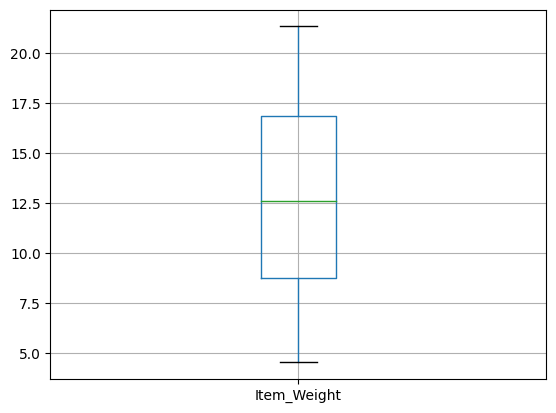

In [ ]:
#After seeing that we have missing values ​​in item weight more than 10% then we will see if it is outliers we will replace missing values ​​with median if not with mean
df.boxplot(column=['Item_Weight'])

In [ ]:
# then according to the boxplot we see that there are no outliers so we will replace missing values ​​by the average

# Calculate the average of the 'Item_Weight' column
mean_weight = df['Item_Weight'].mean()

# Replace missing values ​​with mean
df['Item_Weight'].fillna(mean_weight, inplace=True)


In [ ]:

# here we have values ​​missed by more than 20% for the categorical variable outlet size so we will replace them, by fashion
# Example of imputation with the most frequent method
mode_size = df['Outlet_Size'].mode()[0]
df['Outlet_Size'].fillna(mode_size, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


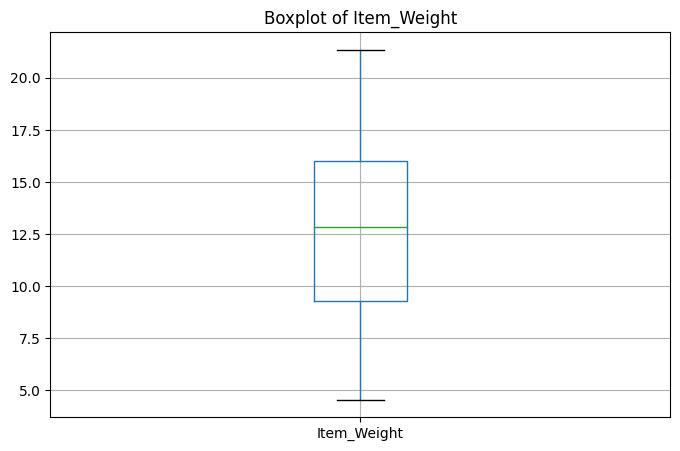

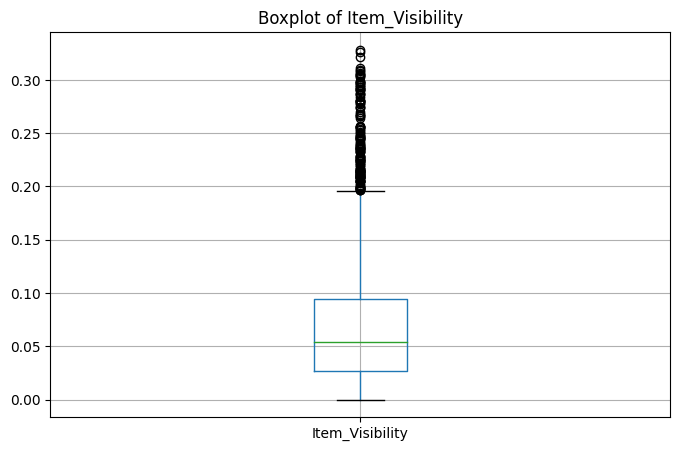

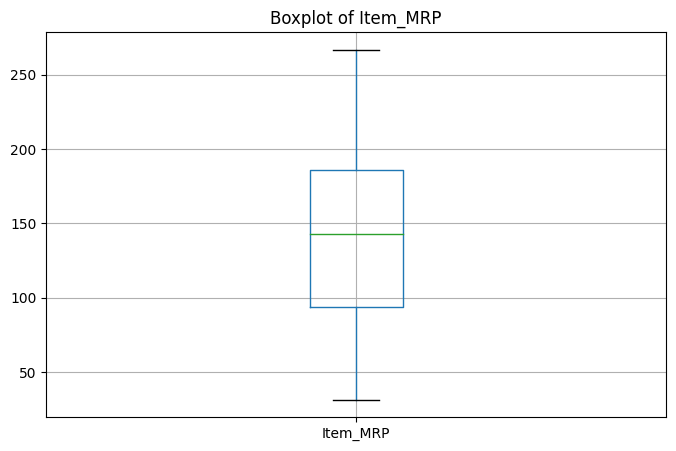

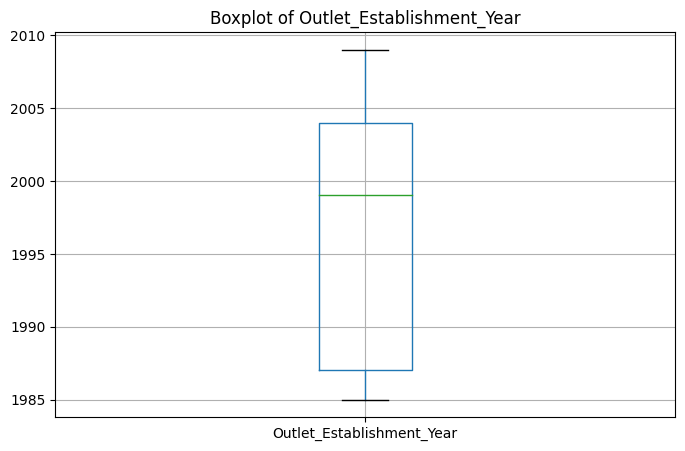

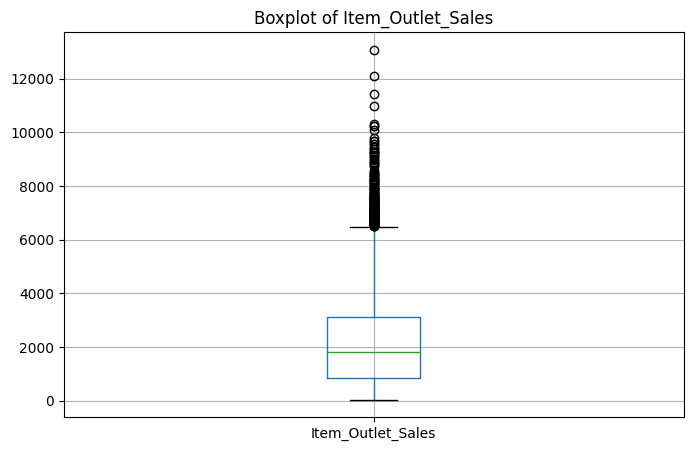

In [ ]:
#handling outliers
import matplotlib.pyplot as plt

selected_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

# Create separate boxplots for each column
for column in selected_columns:
    plt.figure(figsize=(8, 5))
    df.boxplot(column=[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


In [ ]:
import pandas as pd

#  the column containing the values ​​to process
column_namee = 'Item_Visibility'
df_no_outliers = df.copy()

# Calculate the first quartile (Q1) and the third quartile (Q3)
Q1 = df[column_namee].quantile(0.25)
Q3 = df[column_namee].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Set the acceptable range of values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace values ​​outside the acceptable range with IQR limits
df_no_outliers[column_namee] = df_no_outliers[column_namee].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

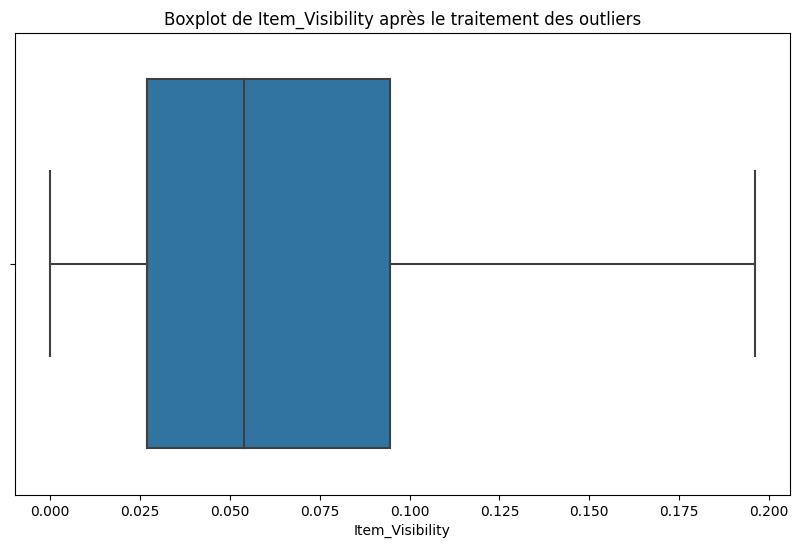

In [ ]:
# Show the boxplot after processing des outliers
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers[column_namee])
plt.title(f'Boxplot de {column_namee} après le traitement des outliers')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# the column containing the values ​​to process
column_name = 'Item_Outlet_Sales'
df_no_outlierss = df_no_outliers.copy()

# Calculate the first quartile (Q1) and the third quartile (Q3)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Set the acceptable range of values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with IQR limits
df_no_outlierss[column_name] = np.where(df_no_outlierss[column_name] < lower_bound, lower_bound, df_no_outliers[column_name])
df_no_outlierss[column_name] = np.where(df_no_outlierss[column_name] > upper_bound, upper_bound, df_no_outliers[column_name])

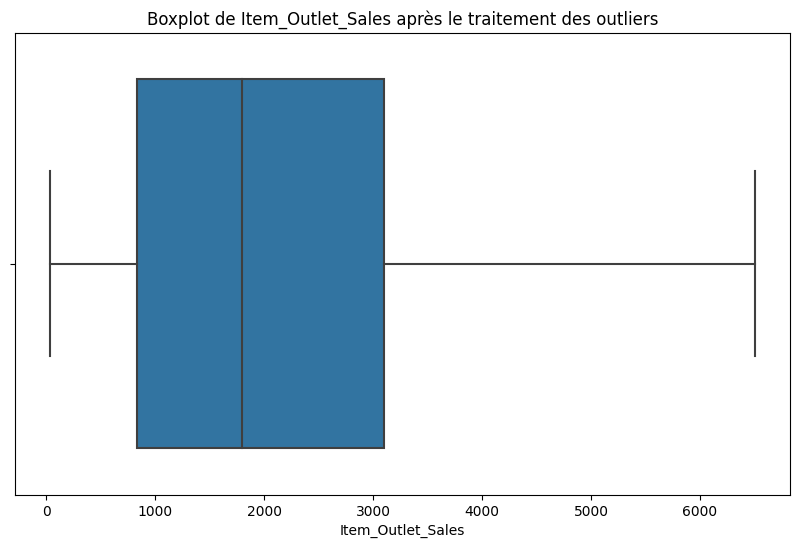

In [ ]:
# Show the boxplot after processing des outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outlierss[column_name])
plt.title(f'Boxplot de {column_name} après le traitement des outliers')
plt.show()

In [ ]:
df= df_no_outlierss.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


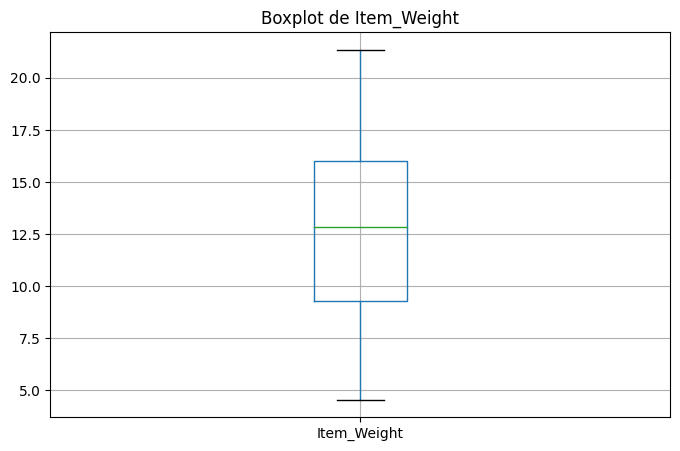

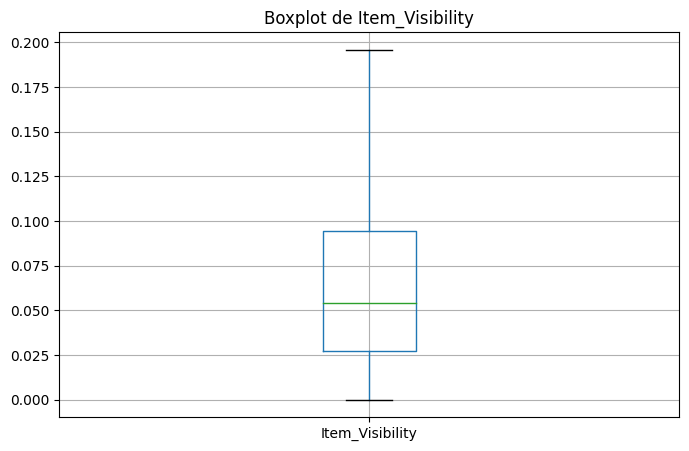

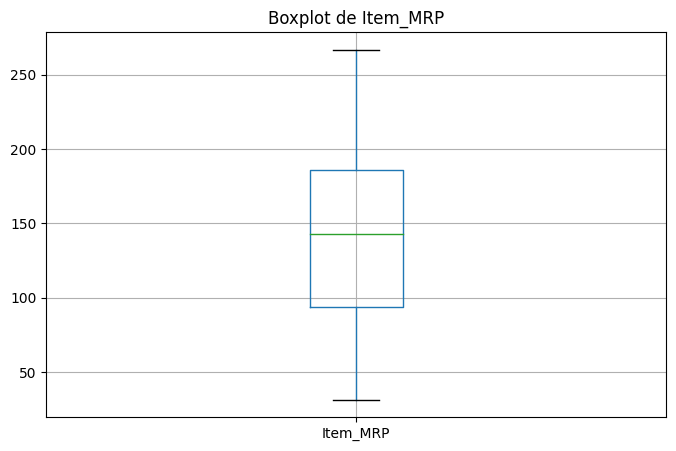

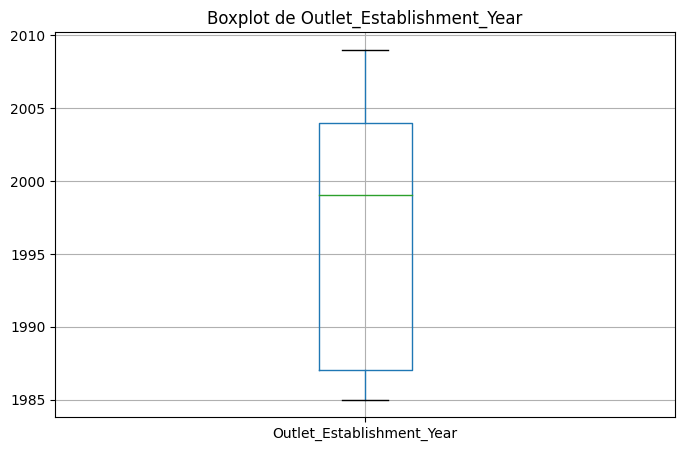

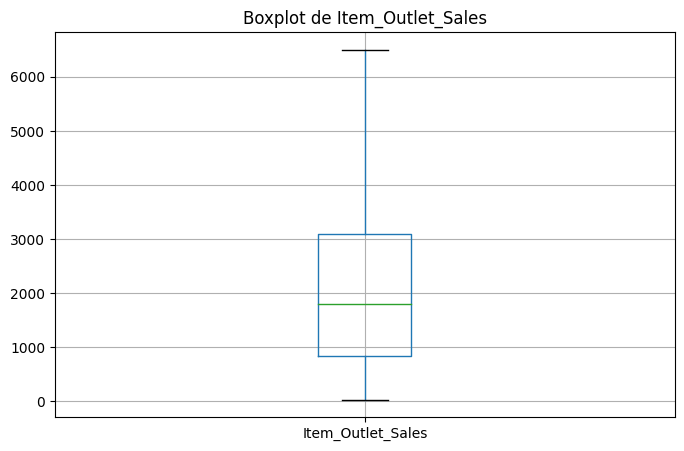

In [ ]:
import matplotlib.pyplot as plt

selected_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

# Create separate boxplots for each column
for column in selected_columns:
    plt.figure(figsize=(8, 5))
    df.boxplot(column=[column])
    plt.title(f'Boxplot de {column}')
    plt.show()


In [ ]:
#Handling Duplicate records
#check for the duplicate values
dup=df.duplicated()
print(dup.sum())



0


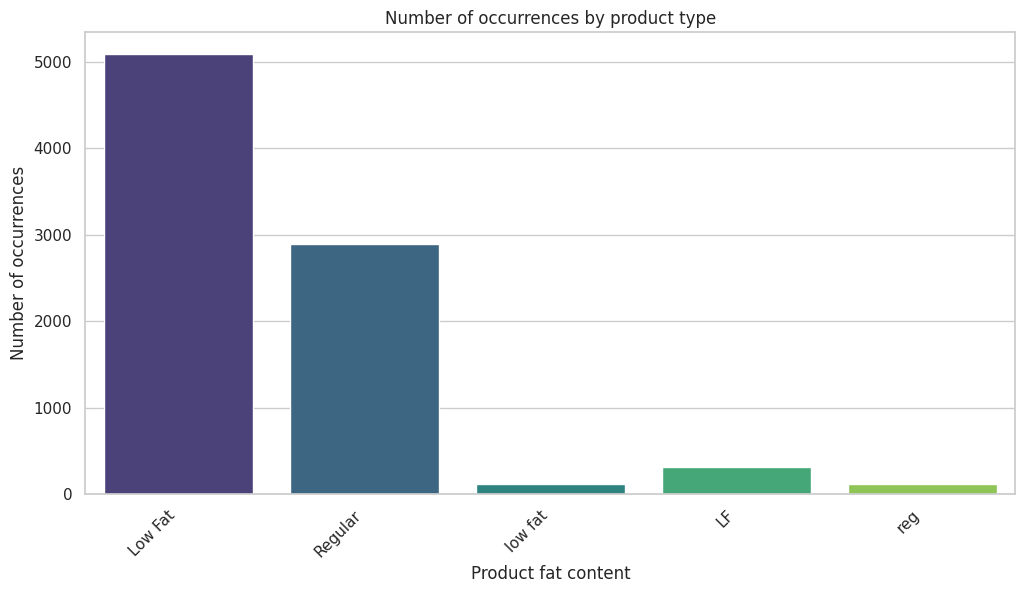

In [ ]:
#univariate
import matplotlib.pyplot as plt
import seaborn as sns

#'Item_Fat_Content' is the categorical variable
sns.set(style="whitegrid") # Optional: set the chart background style
plt.figure(figsize=(12, 6))

# Use Seaborn to create a bar chart
sns.countplot(x='Item_Fat_Content', data=df, palette='viridis')

# Adjust labels to avoid overlap
plt.xticks(rotation=45, ha='right')

# Edit x and y axis titles
plt.title('Number of occurrences by product type')
plt.xlabel('Product fat content') # x-axis title
plt.ylabel('Number of occurrences') # Title of the y axis

plt.show()


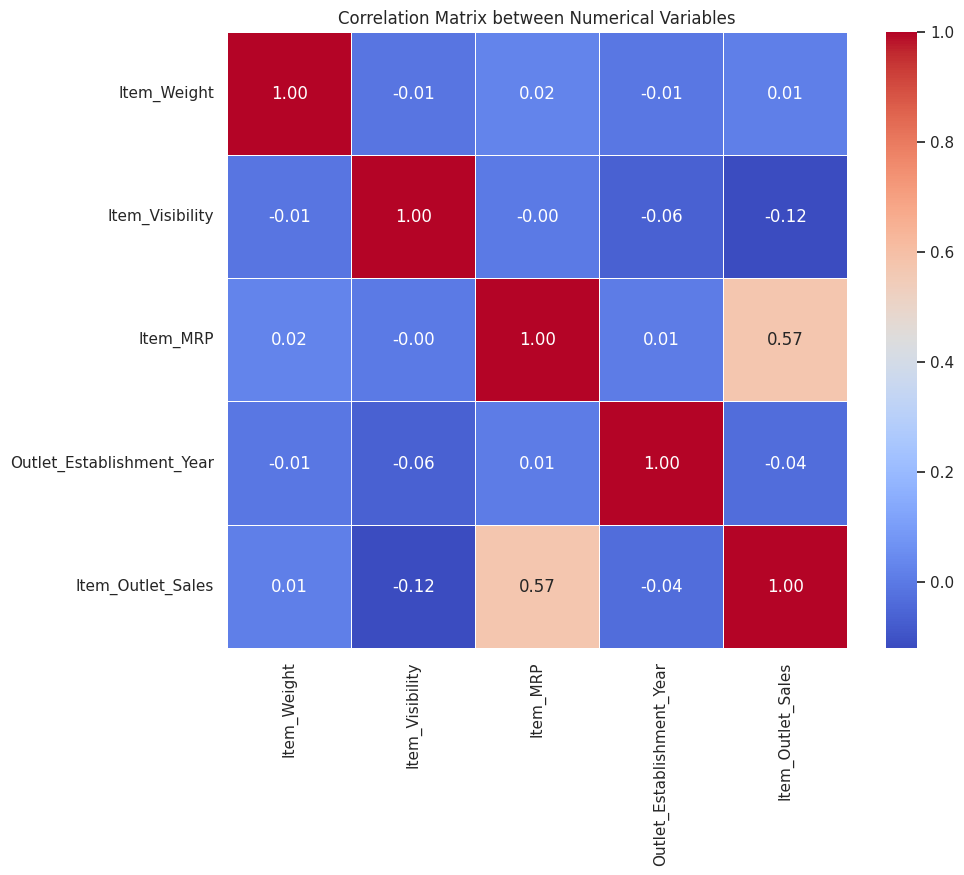

In [ ]:
#bivariate

import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric variables
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a subsection of the DataFrame with numeric variables
numerical_df = df[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix between Numerical Variables')
plt.show()

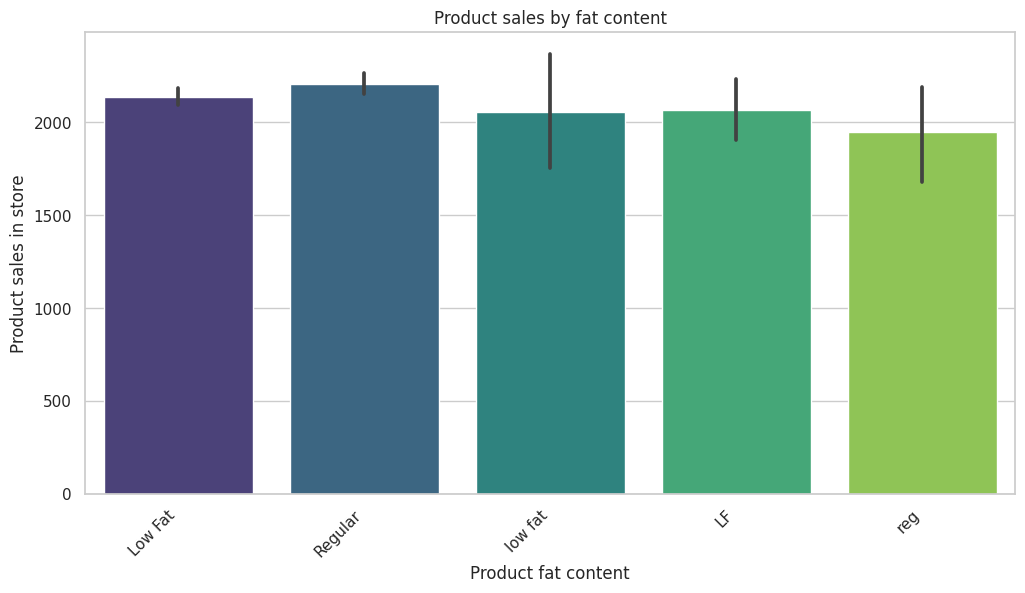

In [ ]:
# the bar chart allows you to visualize how product sales vary based on the fat content of the product.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Use Seaborn to create a bar chart
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df, palette='viridis')

# Adjust labels to avoid overlap
plt.xticks(rotation=45, ha='right')

# Add titles and labels
plt.title('Product sales by fat content')
plt.xlabel('Product fat content')
plt.ylabel('Product sales in store')

plt.show()

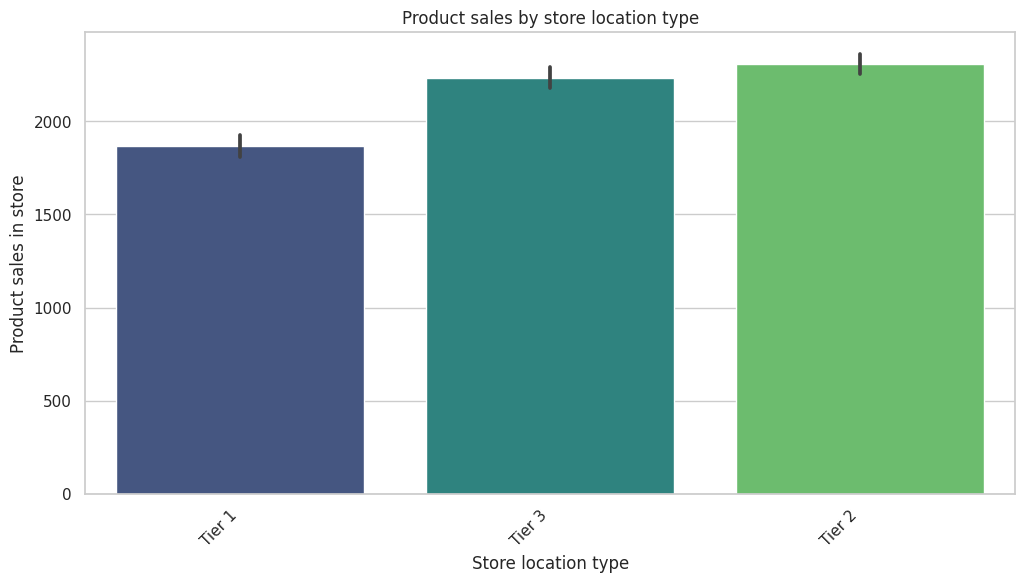

In [ ]:
# The bar chart allows you to visualize how product sales vary depending on store location.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Use Seaborn to create a bar chart
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df, palette='viridis')

# Adjust labels to avoid overlap
plt.xticks(rotation=45, ha='right')

# Add titles and labels
plt.title('Product sales by store location type')
plt.xlabel('Store location type')
plt.ylabel('Product sales in store')

plt.show()

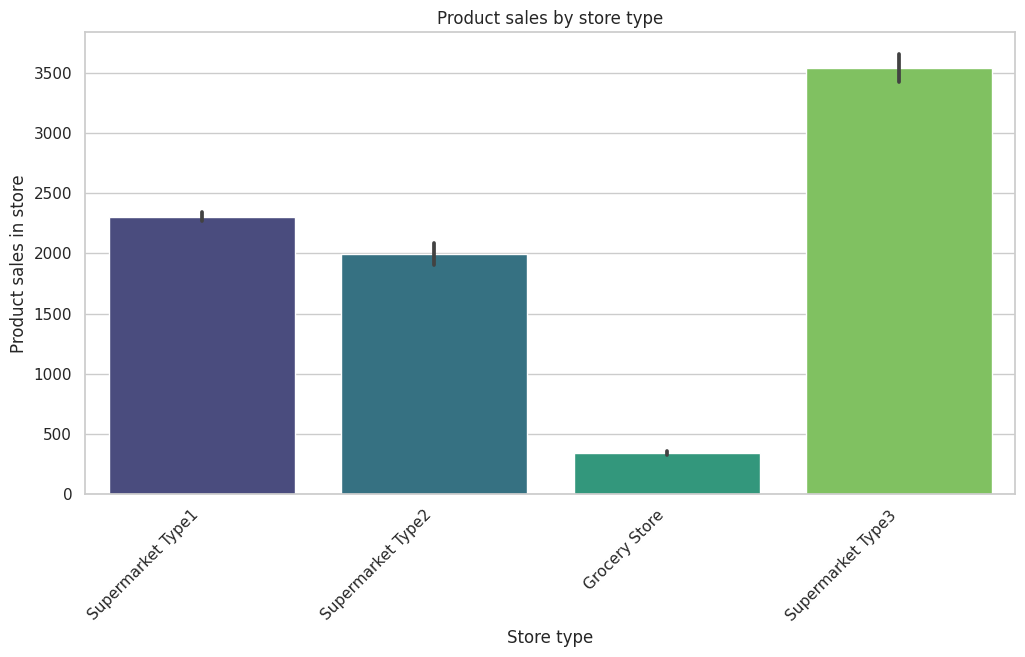

In [ ]:
# The bar chart allows you to visualize how product sales vary based on Store Type.
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'df' is your DataFrame
plt.figure(figsize=(12, 6))

# Use Seaborn to create a bar chart
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, palette='viridis')

# Adjust labels to avoid overlap
plt.xticks(rotation=45, ha='right')

# Add titles and labels
plt.title('Product sales by store type')
plt.xlabel('Store type')
plt.ylabel('Product sales in store')

plt.show()

In [ ]:
#one hot encoding

import pandas as pd

# List of categorical column names to encode
categorical_columns = [ 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Use the pd.get_dummies() function to perform one-hot coding
df = pd.get_dummies(df, columns=categorical_columns, prefix='', prefix_sep='')




In [ ]:
#encoding label encoder
from sklearn.preprocessing import LabelEncoder

# List of categorical column names to encode
categorical_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier']

# Create a LabelEncoder object for each categorical column
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])





In [ ]:
#normalization
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select numeric columns to normalize
numerical_columns = df.select_dtypes(include=['float64', 'int64','uint8']).columns

# Normalize the entire DataFrame
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])





In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0.100128,0.282525,0.25,0.081883,0.266667,0.927507,1.000000,0.583333,0.572281,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.005135,0.081274,0.50,0.098369,0.933333,0.072068,0.333333,1.000000,0.063404,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.424904,0.770765,0.25,0.085520,0.666667,0.468288,1.000000,0.583333,0.319078,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.719512,0.871986,0.50,0.000000,0.400000,0.640093,0.000000,0.541667,0.108075,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.832478,0.260494,0.25,0.000000,0.600000,0.095805,0.111111,0.083333,0.148628,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:

#modeling

# Separate features and target

# Select characteristics (X)
X = df.drop(columns=['Item_Outlet_Sales'])

# Select target variable (y)
y = df['Item_Outlet_Sales']




In [ ]:
# Supposons que 'data' est votre DataFrame
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Créer un DataFrame avec les pourcentages de valeurs manquantes
missing_data = pd.DataFrame({'Missing Percentage': missing_percentages})

# Afficher les colonnes avec leur pourcentage de valeurs manquantes
print(missing_data)


                           Missing Percentage
Item_Identifier                           0.0
Item_Weight                               0.0
Item_Fat_Content                          0.0
Item_Visibility                           0.0
Item_Type                                 0.0
Item_MRP                                  0.0
Outlet_Identifier                         0.0
Outlet_Establishment_Year                 0.0
Item_Outlet_Sales                         0.0
High                                      0.0
Medium                                    0.0
Small                                     0.0
Tier 1                                    0.0
Tier 2                                    0.0
Tier 3                                    0.0
Grocery Store                             0.0
Supermarket Type1                         0.0
Supermarket Type2                         0.0
Supermarket Type3                         0.0


In [ ]:

from sklearn import metrics


# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate model performance
rff= metrics.r2_score(y_test, predictions)
print(f'r2 score: {rff}')

r2 score: 0.5931020151187988


In [ ]:
#randomforest

from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Evaluate performance
rf= metrics.r2_score(y_test, rf_pred)
print(f"R2: {rf}")




R2: 0.5810490256495666


In [ ]:
#xgboost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb


# Initialize the XGBoost model
modelXG = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model on the training set
modelXG.fit(X_train, y_train)

# Make predictions about the test set
y_pred = modelXG.predict(X_test)

# Evaluate model performance

r2 = r2_score(y_test, y_pred)

# Show results

print(f'R-squared: {r2}')


R-squared: 0.5517071098824489


In [ ]:
#Regularized Linear Regression
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Create a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust alpha as needed

# Train the model on the training data
ridge_model.fit(X_train, y_train)


# Make predictions on the test data
y_predd = ridge_model.predict(X_test)

# Evaluate the model's performance
r2rid = r2_score(y_test, y_predd)
print(f'Mean Squared Error: {r2rid}')




Mean Squared Error: 0.5932596767817442


In [ ]:
#Saving the model
# Import the joblib library
from joblib import dump, load

dump(ridge_model, 'ridge_model.pkl')

# Load the model from the file
loaded_model = load('ridge_model.pkl')




In [ ]:
#Final Predictions On The Test Dataset
# Import data on Google Colab
from google.colab import files
import io
uploaded = files.upload()



Saving Test.xlsx to Test (1).xlsx


In [ ]:
# Specify the path to your Excel file
excel_file = 'Test.xlsx'
# Read the Excel file into a pandas DataFrame
dff = pd.read_excel(excel_file)
# Specify the path to save the CSV file
csv_file = 'data.csv'
# Save the DataFrame as CSV
dff.to_csv(csv_file, index=False)


dff = pd.read_csv('data.csv')

In [ ]:
#Handling missing value
dff.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
missing_percentages = (dff.isnull().sum() / len(dff)) * 100

# Create a DataFrame with the percentages of missing values
missing_data = pd.DataFrame({'Missing Percentage': missing_percentages})

# Show columns with their percentage of missing values
print(missing_data)

                           Missing Percentage
Item_Identifier                      0.000000
Item_Weight                         17.180074
Item_Fat_Content                     0.000000
Item_Visibility                      0.000000
Item_Type                            0.000000
Item_MRP                             0.000000
Outlet_Identifier                    0.000000
Outlet_Establishment_Year            0.000000
Outlet_Size                         28.269671
Outlet_Location_Type                 0.000000
Outlet_Type                          0.000000


In [ ]:
# then according to the boxplot we see that there are no outliers so we will replace missing values ​​by the average

# Calculate the average of the 'Item_Weight' column
mean_weight = dff['Item_Weight'].mean()

# Replace missing values ​​with mean
dff['Item_Weight'].fillna(mean_weight, inplace=True)


In [ ]:
# here we have values ​​missed by more than 20% for the categorical variable outlet size so we will replace them, by fashion
# Example of imputation with the most frequent method
mode_size = dff['Outlet_Size'].mode()[0]
dff['Outlet_Size'].fillna(mode_size, inplace=True)

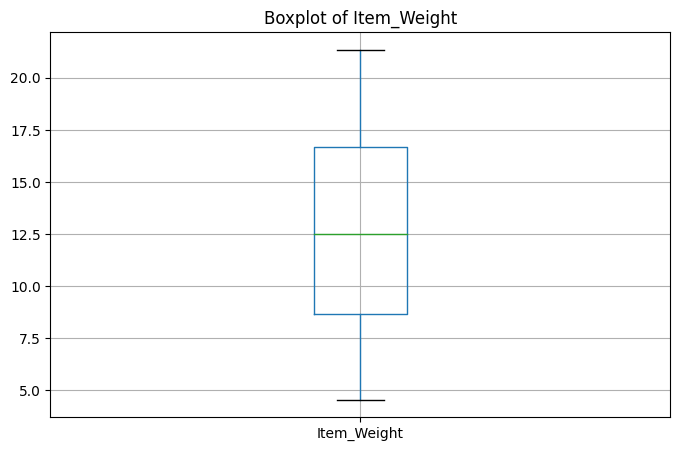

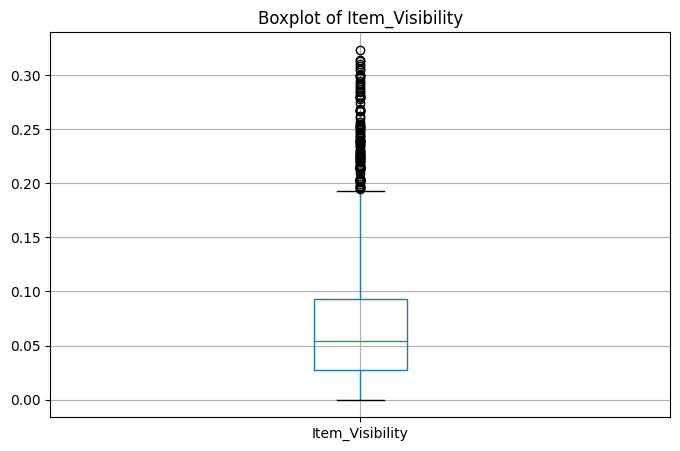

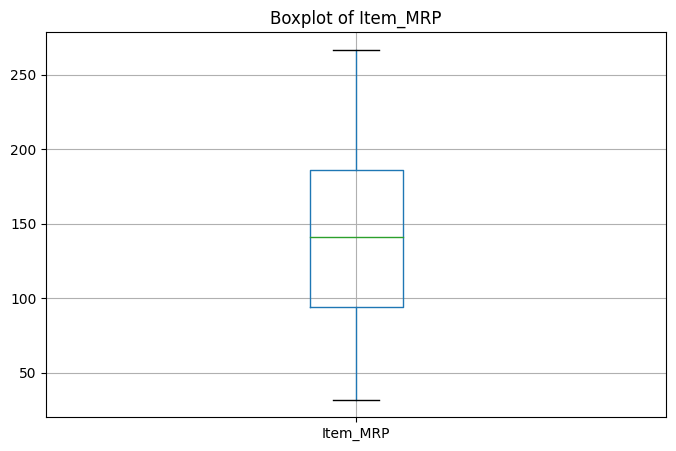

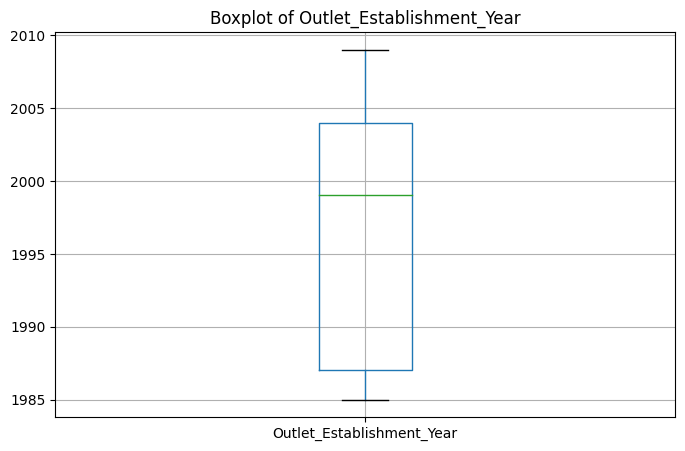

In [ ]:
#handling outliers
import matplotlib.pyplot as plt

selected_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

# Create separate boxplots for each column
for column in selected_columns:
    plt.figure(figsize=(8, 5))
    dff.boxplot(column=[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [ ]:
import pandas as pd

#  the column containing the values ​​to process
column_namee = 'Item_Visibility'
dff_no_outliers = dff.copy()

# Calculate the first quartile (Q1) and the third quartile (Q3)
Q1 = dff[column_namee].quantile(0.25)
Q3 = dff[column_namee].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Set the acceptable range of values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace values ​​outside the acceptable range with IQR limits
dff_no_outliers[column_namee] = dff_no_outliers[column_namee].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

In [ ]:
dff= dff_no_outliers.copy()
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
#Handling Duplicate records
#check for the duplicate values
dup=dff.duplicated()
print(dup.sum())


0


In [ ]:
#one hot encoding

import pandas as pd

# List of categorical column names to encode
categorical_columns = [ 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Use the pd.get_dummies() function to perform one-hot coding
dff = pd.get_dummies(dff, columns=categorical_columns, prefix='', prefix_sep='')

In [ ]:
#encoding label encoder
from sklearn.preprocessing import LabelEncoder

# List of categorical column names to encode
categorical_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier']

# Create a LabelEncoder object for each categorical column
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    dff[col] = label_encoders[col].fit_transform(dff[col])

In [ ]:
#normalization
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select numeric columns to normalize
numerical_columns = dff.select_dtypes(include=['float64', 'int64','uint8']).columns

# Normalize the entire DataFrame
dff[numerical_columns] = scaler.fit_transform(dff[numerical_columns])


In [ ]:
# Create the linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate model performance
rff= metrics.r2_score(y_test, predictions)
print(f'r2 score: {rff}')

In [ ]:
from joblib import load  # For newer versions of scikit-learn, use "from joblib import load"

# Load the trained model
loaded_model = load('ridge_model.pkl')

predictions = loaded_model.predict(dff)

# Display the predictions
print(predictions)



[0.27727369 0.24556263 0.28042719 ... 0.2883671  0.53191913 0.19901864]
